<h1>Data Mining Assignment 1 Variant 2: Comparison of Decision Tree and Random Forest Classifiers </h1>

df Set Information:

Extraction was done by Barry Becker from the 1994 Census dfbase. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

Attribute Information:

Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

<h2>Read and Combine adult.data and adult.test </h2>


In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn import metrics 

column_names = ['age', 'workclass', 'fnlwgt', 'education', 
                'educational-num','marital-status', 'occupation', 
                'relationship', 'race', 'gender','capital-gain', 
                'capital-loss', 'hours-per-week', 'native-country','income']

train = pd.read_csv('adult.data', sep=",\s", header=None, names = column_names)
test = pd.read_csv('adult.test', sep=",\s", header=None, names = column_names)
test['income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'')

df = pd.concat([test,train])
df.reset_index(inplace = True, drop = True)

df

C:\Users\Erwin Agustian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48839,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48840,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48841,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


 <h2> Exploratory Data Analysis (EDA)</h2>

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48843 non-null  object 
 1   workclass        48842 non-null  object 
 2   fnlwgt           48842 non-null  float64
 3   education        48842 non-null  object 
 4   educational-num  48842 non-null  float64
 5   marital-status   48842 non-null  object 
 6   occupation       48842 non-null  object 
 7   relationship     48842 non-null  object 
 8   race             48842 non-null  object 
 9   gender           48842 non-null  object 
 10  capital-gain     48842 non-null  float64
 11  capital-loss     48842 non-null  float64
 12  hours-per-week   48842 non-null  float64
 13  native-country   48842 non-null  object 
 14  income           48842 non-null  object 
dtypes: float64(5), object(10)
memory usage: 5.6+ MB


In [217]:
df.describe()

,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Examining the numerical values. In this situation, fnlwgt and educational-num make sense as integers, but their numerical values have no numerical significance. For instance, an educational number is merely education turned into a number.

<h3> Missing Values </h3>
Search for missing values, convert them to NaNs, then remove any entries with missing values

In [218]:
# Checking for missing values
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [219]:
#Transforming missing values to NaNs
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native-country'] = df['native-country'].replace('?', np.nan) 

df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [220]:
#Dropping missing value
df.dropna(how ='any', inplace = True) 

#Checking to see that values were really dropped
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [221]:
#Checking the new shape of the df, to see how many rows are dropped.
df.shape

(45222, 15)

<h3> Univariate Analysis </h3>

In [222]:
df['age'].describe()

count     45222
unique      145
top          36
freq        852
Name: age, dtype: int64

<AxesSubplot:title={'center':'Age'}, xlabel='age', ylabel='values'>

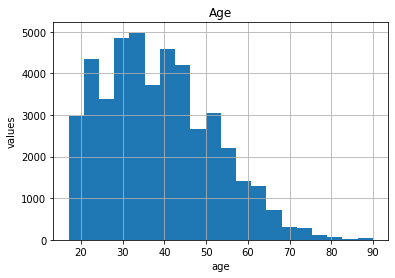

In [223]:
df = df.astype({'age': int})
plt.title('Age')
plt.xlabel('age')
plt.ylabel('values')
df['age'].hist(bins=20)

In [224]:
df["workclass"].describe()

count       45222
unique          7
top       Private
freq        33307
Name: workclass, dtype: object

<AxesSubplot:title={'center':'Hours-per-week'}, xlabel='hours-per-week', ylabel='values'>

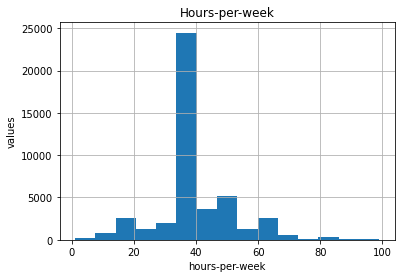

In [225]:
plt.title('Hours-per-week')
plt.xlabel('hours-per-week')
plt.ylabel('values')
df["hours-per-week"].hist(bins=15)

<AxesSubplot:title={'center':'Working Class'}, xlabel='working class', ylabel='values'>

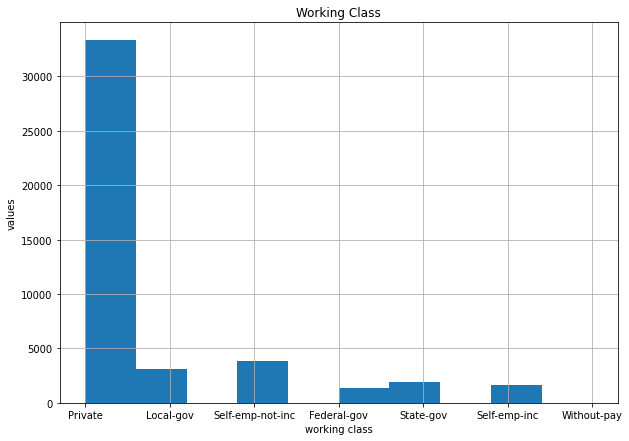

In [226]:
plt.figure(figsize=(10,7))
plt.title('Working Class')
plt.xlabel('working class')
plt.ylabel('values')
df["workclass"].hist()

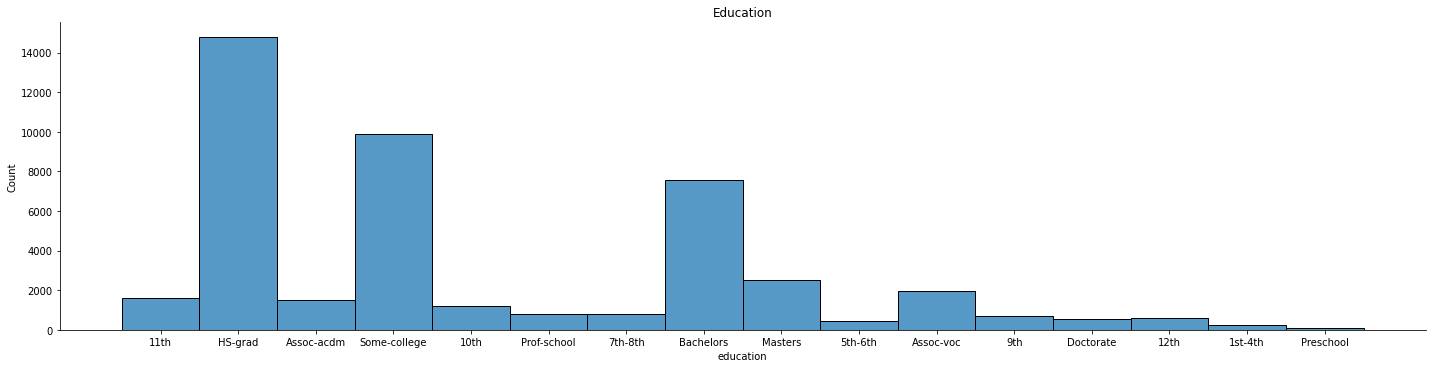

In [227]:
sns.displot(x=df["education"],aspect=4)
plt.title('Education')
plt.show()

In [228]:
df['race'].describe()

count     45222
unique        5
top       White
freq      38903
Name: race, dtype: object

<AxesSubplot:title={'center':'Race'}, xlabel='race', ylabel='values'>

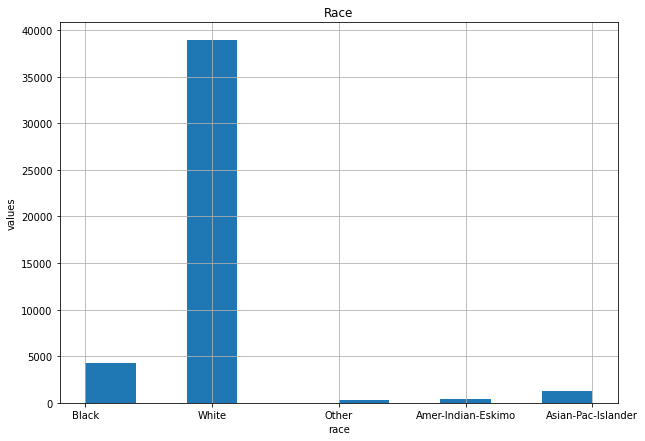

In [229]:
plt.figure(figsize=(10,7))
plt.title('Race')
plt.xlabel('race')
plt.ylabel('values')
df["race"].hist()

In [230]:
df['race'].groupby(df['race']).count()

race
Amer-Indian-Eskimo      435
Asian-Pac-Islander     1303
Black                  4228
Other                   353
White                 38903
Name: race, dtype: int64

In [231]:
df['native-country'].describe()

count             45222
unique               41
top       United-States
freq              41292
Name: native-country, dtype: object

In [232]:
df['native-country'].groupby(df['native-country']).count()


native-country
Cambodia                         26
Canada                          163
China                           113
Columbia                         82
Cuba                            133
Dominican-Republic               97
Ecuador                          43
El-Salvador                     147
England                         119
France                           36
Germany                         193
Greece                           49
Guatemala                        86
Haiti                            69
Holand-Netherlands                1
Honduras                         19
Hong                             28
Hungary                          18
India                           147
Iran                             56
Ireland                          36
Italy                           100
Jamaica                         103
Japan                            89
Laos                             21
Mexico                          903
Nicaragua                        48
Outlying-US(G

In [233]:
#Grouping native countries and creating a new column country
#USA = 1, Others = 0
df['country'] = np.where(df['native-country']=='United-States',1 ,0)
df['country']

1        1
2        1
3        1
4        1
6        1
        ..
48838    1
48839    1
48840    1
48841    1
48842    1
Name: country, Length: 45222, dtype: int32

In [234]:
df['country'].groupby(df['country']).count()

country
0     3930
1    41292
Name: country, dtype: int64

In [235]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [236]:
df['education'].groupby(df['education']).count()

education
10th             1223
11th             1619
12th              577
1st-4th           222
5th-6th           449
7th-8th           823
9th               676
Assoc-acdm       1507
Assoc-voc        1959
Bachelors        7570
Doctorate         544
HS-grad         14783
Masters          2514
Preschool          72
Prof-school       785
Some-college     9899
Name: education, dtype: int64

In [237]:
df['gender'].groupby(df['gender']).count()

gender
Female    14695
Male      30527
Name: gender, dtype: int64

In [238]:
df['capital-gain'].groupby(df['capital-gain']).count()

capital-gain
0.0        41432
114.0          8
401.0          2
594.0         42
914.0         10
           ...  
25236.0       14
27828.0       56
34095.0        4
41310.0        3
99999.0      229
Name: capital-gain, Length: 121, dtype: int64

In [239]:
df['capital-loss'].groupby(df['capital-loss']).count()

capital-loss
0.0       43082
155.0         1
213.0         5
323.0         5
419.0         1
          ...  
3175.0        2
3683.0        2
3770.0        4
3900.0        2
4356.0        1
Name: capital-loss, Length: 97, dtype: int64

In [240]:
df["occupation"].describe()

count            45222
unique              14
top       Craft-repair
freq              6020
Name: occupation, dtype: object

In [241]:
df['occupation'].groupby(df['occupation']).count()

occupation
Adm-clerical         5540
Armed-Forces           14
Craft-repair         6020
Exec-managerial      5984
Farming-fishing      1480
Handlers-cleaners    2046
Machine-op-inspct    2970
Other-service        4808
Priv-house-serv       232
Prof-specialty       6008
Protective-serv       976
Sales                5408
Tech-support         1420
Transport-moving     2316
Name: occupation, dtype: int64

In [242]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

<h3> Bivariate Analysis

<h4>Age vs Income

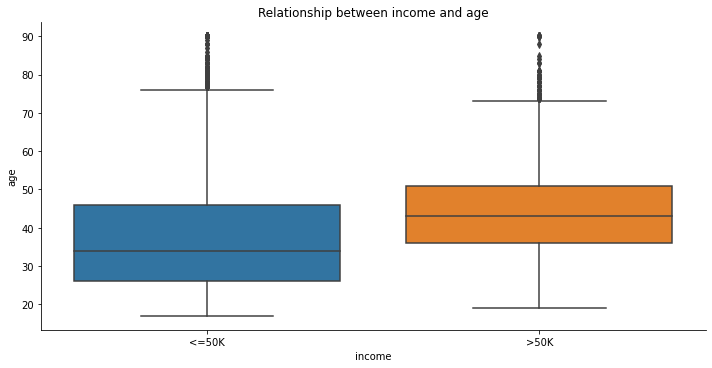

In [243]:
#Checking the initial relation between age of income
df = df.astype({'age': int})
df = df.astype({'income': str})
sns.catplot(data=df, x="income", y="age", kind="box", aspect=2)
plt.title("Relationship between income and age")
plt.show()

<h4>Education vs Income

Text(0, 0.5, 'Population')

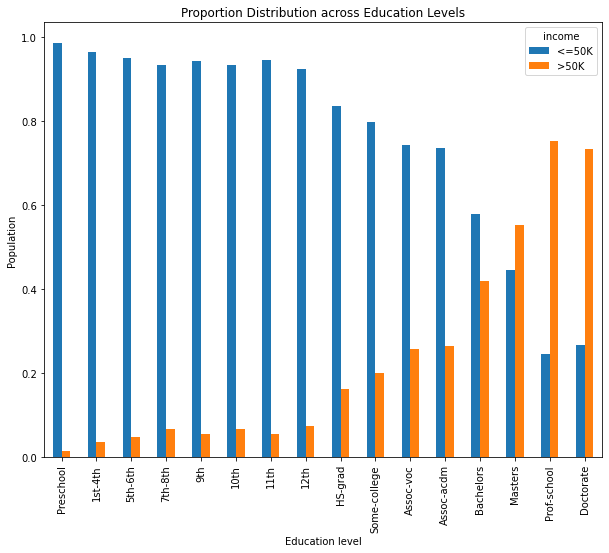

In [244]:
edu_level = {}
for x,y in df[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

education = pd.crosstab(df.education, df.income).div(pd.crosstab(df.education, df.income).apply(sum,1),0)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion Distribution across Education Levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Population')

<h4>Working Class vs Income

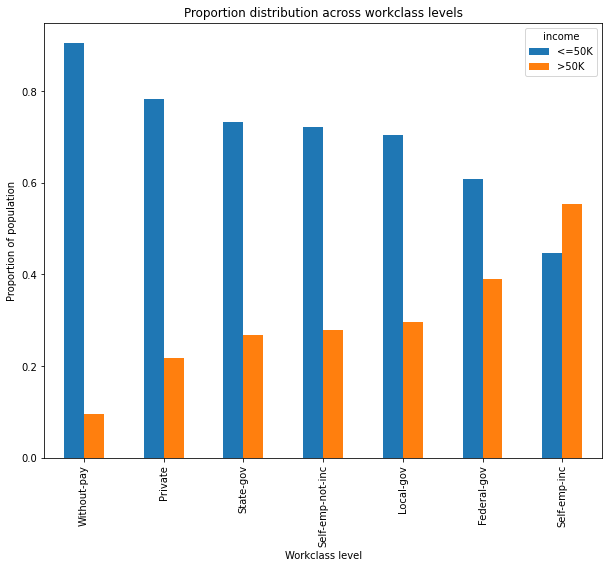

In [245]:
#Checking to see which working class as the highest income
workclass = pd.crosstab(df.workclass, df.income).div(pd.crosstab(df.workclass, df.income).apply(sum,1),0)
workclass.sort_values(by = '>50K', inplace = True)
ax = workclass.plot(kind ='bar', title = 'Proportion distribution across workclass levels', figsize = (10,8))
ax.set_xlabel('Workclass level')
ax.set_ylabel('Proportion of population')

print()

<h4>Gender vs Income

Text(0, 0.5, 'Proportion of population')

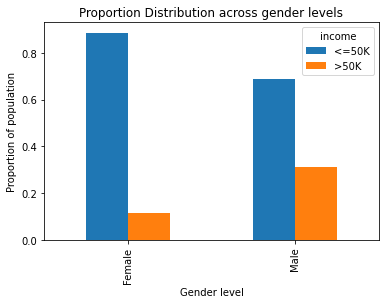

In [246]:
#Checking to see which gender is more likely to have a higher than 50k income
gender = pd.crosstab(df.gender, df.income).div(pd.crosstab(df.gender, df.income).apply(sum,1),0)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Proportion Distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

Text(17.200000000000003, 0.5, 'Proportion of population')

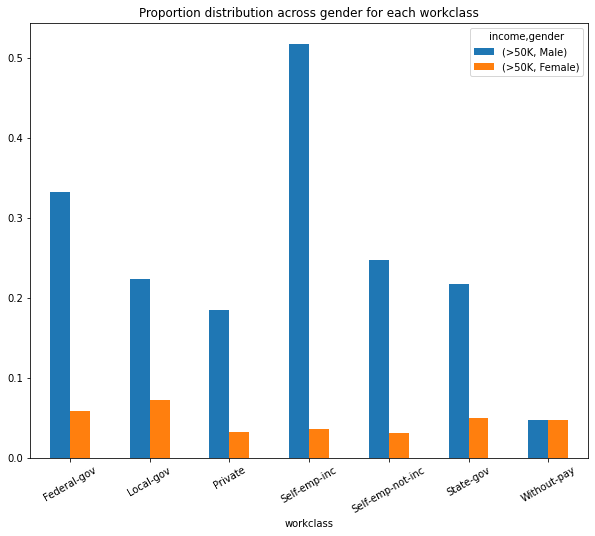

In [247]:
gender_workclass = pd.crosstab(df.workclass, [df.income, df.gender]).div(pd.crosstab(df.workclass, [df.income, df.gender]).apply(sum,1),0)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

In [248]:
df.groupby('gender')['capital-gain'].mean().sort_values(ascending=False)

gender
Male      1348.520294
Female     588.132290
Name: capital-gain, dtype: float64

<h4>Race vs Income

Text(0, 0.5, 'Proportion of population')

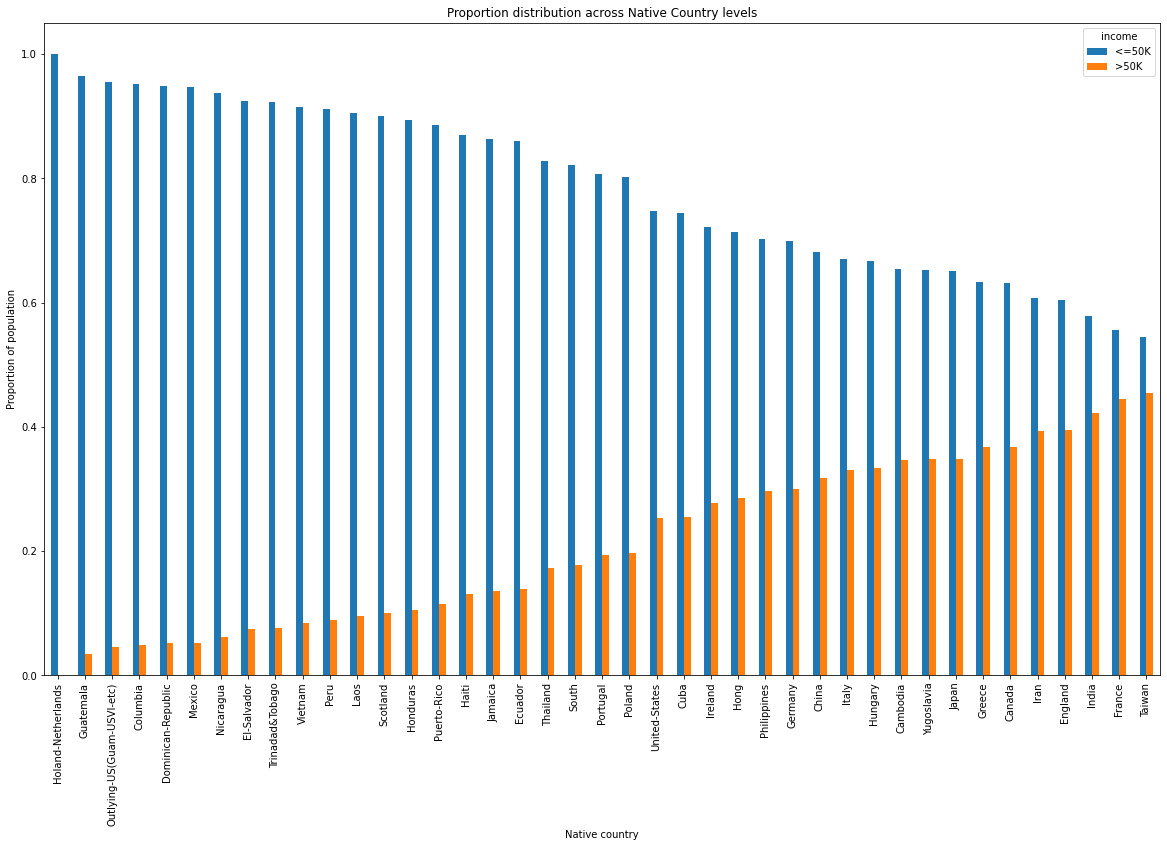

In [249]:
native_country = pd.crosstab(df['native-country'], df.income).div(pd.crosstab(df['native-country'], df.income).apply(sum,1),0)
native_country.sort_values(by = '>50K', inplace = True)
ax = native_country.plot(kind ='bar', title = 'Proportion distribution across Native Country levels', figsize = (20,12))
ax.set_xlabel('Native country')
ax.set_ylabel('Proportion of population')

In [250]:
df.groupby('race')['educational-num'].mean().sort_values(ascending=False)

race
Asian-Pac-Islander    11.045280
White                 10.171503
Black                  9.531220
Amer-Indian-Eskimo     9.420690
Other                  8.745042
Name: educational-num, dtype: float64

<h3> Multivariate Analysis

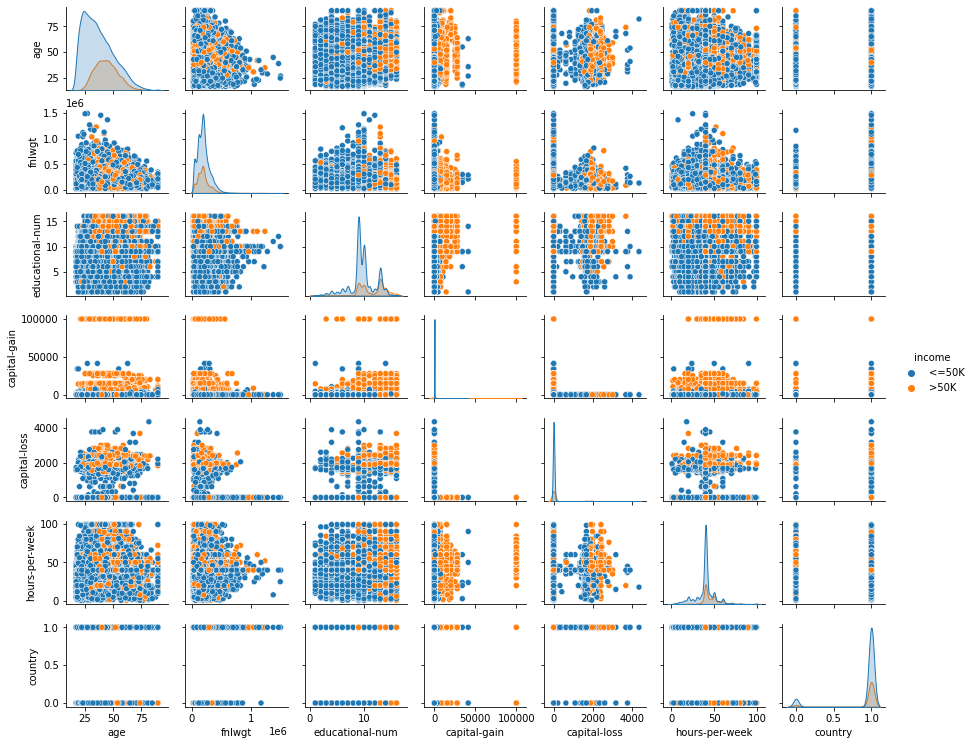

In [251]:
sns.pairplot(df,hue='income', height=1.5, aspect=1.2)
plt.show()


Because of the high variety of the variables, some of the results are not explainable. Both outliers and clustering can be observed in both the sub and above 50k categories.

<h3> Data Transformations </h3>
A number of attributes are gathered and transformed in order to avoid overfitting and eliminate superfluous features. These comprise: marital status, working class, race, and gender.

There are two features for education level that both imply the same thing: "education" and "educational-num." I won't be using the categorical education attribute to prevent the impact of this attribute on the models from being overstated.


In [252]:
df['workclass'] = np.where(df['workclass']==' Private',1 ,0)
df['workclass'].unique()

array([0])

In [253]:
#Making Marital status binary
#Marriage is 1, Not married 0
df.replace(['Divorced' ,'Separated','Never-married', 'Widowed',
            'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'],
             ['0','0','0','0',
              '1','1','1'], inplace = True)

In [254]:
#Making race binary
#Whites are 1, others are 0
df.replace(['White', 'Black', 
              'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 
              'Other'],
             ['1','0','0','0','0'], inplace = True)

In [255]:
#Making gender numerical
#Male 1, Female 0
df.replace([' Male', ' Female'],
             ['1','0'], inplace = True)

In [256]:
#making function to make income numerical
def income_data(income):
    if income == '<=50K': 
        return 0
    else:
        return 1 
    
#Making income numerical.
#Income above 50k = 1, Below 50k = 0
df['encoded_income'] = df['income'].apply(income_data)
df.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,country,encoded_income
1,25,0,226802.0,11th,7.0,0,Machine-op-inspct,Own-child,0,Male,0.0,0.0,40.0,United-States,<=50K,1,0


In [257]:
#benchmark (Naive Model)
df['income'].value_counts(normalize=True) 

<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64

<h3>Dropping Columns </h3>
due to the fact that the binary column countries were already formed. The original column from which encoded income was created, encoded income, is the same as the educational-num equivalent of education.

In [258]:
df = df.drop(["native-country", "education", "income"], axis=1)

<h2>Classifier Models Comparison: 

<h3>Data Preparation </h3>
Multi-class categorical features are represented as binary features, one for each class, through the method of one-hot encoding. Despite the fact that this procedure makes the dataset more dimensional, classification algorithms frequently perform better on this type of data.

All of the categorical features in the sample are repesented using one-hot encoding.

In [259]:
df_hot_encoded = pd.get_dummies(df)
df_hot_encoded = df_hot_encoded.dropna()
df_hot_encoded.columns

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'capital-gain',
       'capital-loss', 'hours-per-week', 'country', 'encoded_income',
       'marital-status_0', 'marital-status_1', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'race_0', 'race_1', 'gender_Female', 'gender_Male'],
      dtype='object')

In [260]:
#Data Prep
train_data, test_data, train_label, test_label = train_test_split(df_hot_encoded.drop('encoded_income',axis=1),  
                                                                  df_hot_encoded['encoded_income'],random_state=7,stratify=df_hot_encoded['encoded_income'])
     
#Normalization
scaler = StandardScaler()

#Fitting only on training data
scaler.fit(train_data)
train_data = scaler.transform(train_data)

#Applying transformation to test data
test_data = scaler.transform(test_data) 


<h3> Decision Tree

In [261]:
from sklearn.tree import DecisionTreeClassifier

#Gini
dt1 =tree.DecisionTreeClassifier(criterion='gini', min_samples_split=0.005,max_depth=5)
dt1 = dt1.fit(train_data, train_label)
t_pred_dt1 = dt1.predict(test_data)
print('Desicion Tree using Gini Index :')
print("Accuracy:",metrics.accuracy_score(test_label, t_pred_dt1))


#Entropy
dt2 =tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=8,max_depth=5)
dt2 = dt2.fit(train_data, train_label)
t_pred_dt2 = dt2.predict(test_data)
print('Desicion Tree using Entropy:')
print("Accuracy:",metrics.accuracy_score(test_label, t_pred_dt2))

Desicion Tree using Gini Index :
Accuracy: 0.8486644259685123
Desicion Tree using Entropy:
Accuracy: 0.8417654342826818


In [262]:
#For Gini Decision Tree
print('Desicion Tree using Gini Index :')
print(classification_report(test_label, t_pred_dt1))

Desicion Tree using Gini Index :
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8504
           1       0.78      0.54      0.64      2802

    accuracy                           0.85     11306
   macro avg       0.82      0.75      0.77     11306
weighted avg       0.84      0.85      0.84     11306



In [263]:
#For Entropy Decision Tree
print('Desicion Tree using Entropy:')
print(classification_report(test_label, t_pred_dt2))

Desicion Tree using Entropy:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      8504
           1       0.78      0.50      0.61      2802

    accuracy                           0.84     11306
   macro avg       0.82      0.73      0.76     11306
weighted avg       0.84      0.84      0.83     11306



<h3> Random Forest

In [264]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier(min_samples_split=20)
rf1.fit(train_data, train_label)
t_pred1 = rf1.predict(test_data)
t_test_pred1 = rf1.predict(train_data)
print('Desicion Tree using Random Forest :')
print("Accuracy:",metrics.accuracy_score(test_label, t_pred1))


Desicion Tree using Random Forest :
Accuracy: 0.8597205023881125


In [265]:
print(classification_report(test_label, t_pred1))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8504
           1       0.77      0.62      0.69      2802

    accuracy                           0.86     11306
   macro avg       0.83      0.78      0.80     11306
weighted avg       0.85      0.86      0.85     11306



<h4>Hyperparameter Fine-Tuning and Comparison

In [266]:
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [267]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(df_hot_encoded.drop('encoded_income',axis=1), df_hot_encoded['encoded_income'])
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.842599,{'n_estimators': 10}
1,decision_tree,0.810026,{'criterion': 'entropy'}
